In [2]:
import pandas as pd
import sklearn.metrics as m
from matplotlib import pyplot as pplot
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Run this line if you are in local
dataset = pd.read_csv('Dataset-Deseased.csv', delimiter= ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,0
1,1,48,305,257,85,279,331,25400,200,0
2,0,68,310,249,86,277,345,24690,177,0
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,0
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,0
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,0
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,0
4689,1,42,"4,44","35,3",12,27,34,7940,202,0


In [3]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1Y8M_43NIbP7V96bA24kXv6rCRE7C7wiD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,deceased
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,0
1,1,48,305,257,85,279,331,25400,200,0
2,0,68,310,249,86,277,345,24690,177,0
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,0
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,0
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,0
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,0
4689,1,42,"4,44","35,3",12,27,34,7940,202,0


In [ ]:
dataset = dataset.replace(',', '.', regex = True)

In [ ]:
x = dataset.drop('deceased', axis = 1)
y = dataset.deceased

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(x, y,train_size=0.5)
print(len(Y_train))
print(len(Y_test))

2345
2346


In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
print(len(X_test))
print(len(Y_test))

2346
2346


In [ ]:
prediction = dtc.predict(X_train)

print("Confusion matrix for train set")
print(m.confusion_matrix(Y_train, prediction))
print("Accuracy",m.accuracy_score(Y_train,prediction))
print("precision = ", m.precision_score(Y_train, prediction, average="weighted"))
print("F Measure",m.f1_score(Y_train,prediction))
print("Recall",m.recall_score(Y_train,prediction), '\n')


predictions = dtc.predict(X_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(Y_test, predictions))
print("Accuracy",m.accuracy_score(Y_test,predictions))
print("Precision",m.precision_score(Y_test,predictions, average='weighted'))
print("F Measure",m.f1_score(Y_test,predictions))
print("Recall",m.recall_score(Y_test,predictions))

Confusion matrix for train set
[[2242    0]
 [  62   41]]
Accuracy 0.9735607675906184
precision =  0.9742722399905236
F Measure 0.5694444444444444
Recall 0.39805825242718446 

Confusion matrix for test set
[[2217   19]
 [  88   22]]
Accuracy 0.954390451832907
Precision 0.9418834883046779
F Measure 0.29139072847682124
Recall 0.2


In [ ]:
featurename = X_train.columns.tolist()
targetname = Y_train.unique().astype('str').tolist()

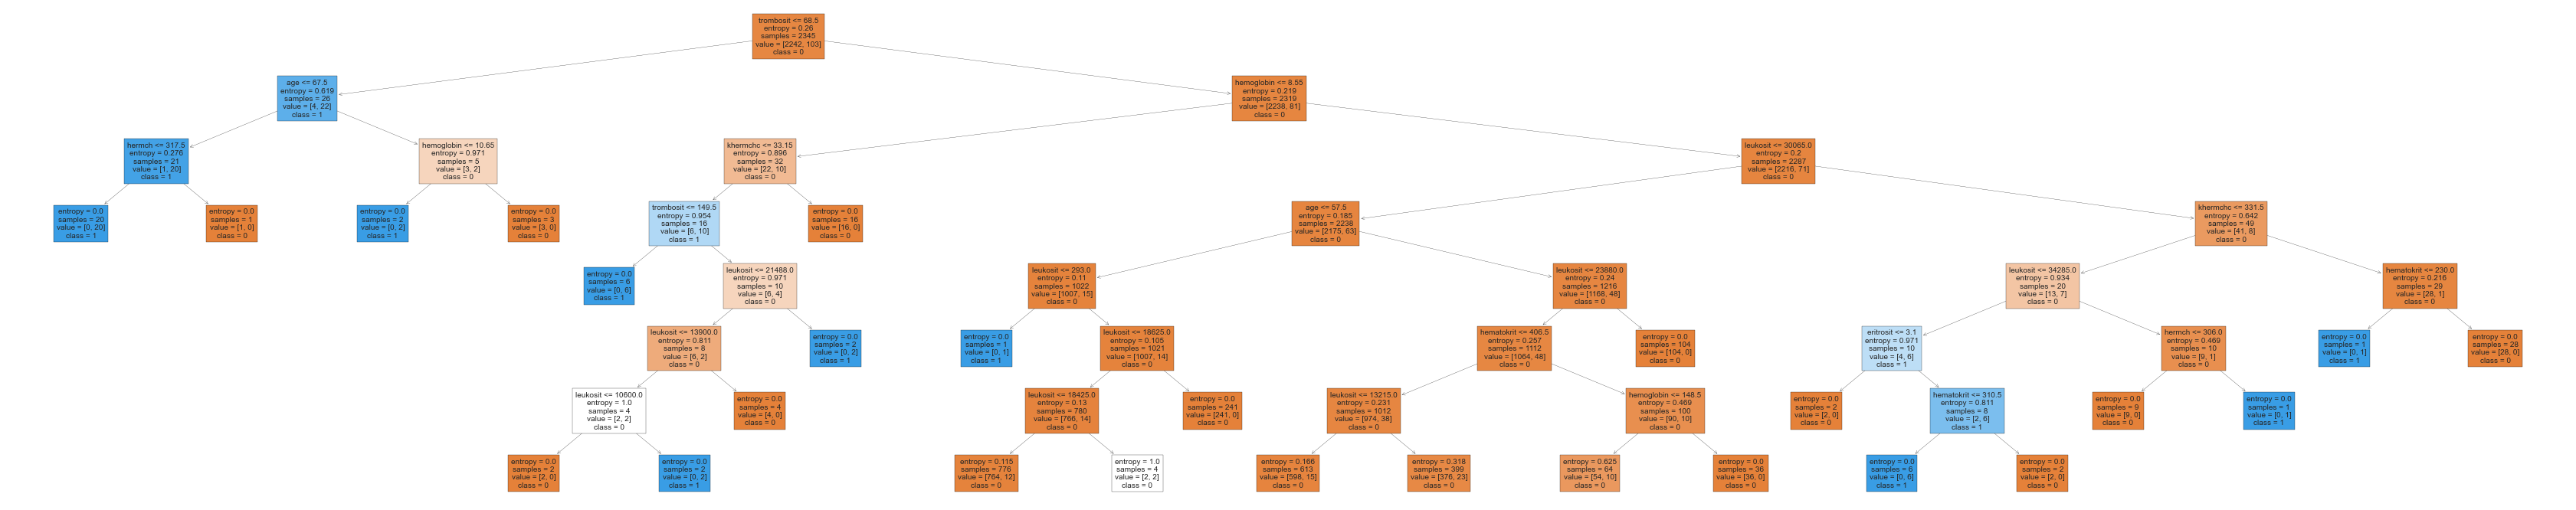

In [ ]:
pplot.figure(figsize=(60,12), )
tree.plot_tree(dtc,
               feature_names = featurename,
               class_names=targetname,
               fontsize=10,
               filled = True);
pplot.savefig('tree decision plot.pdf')

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


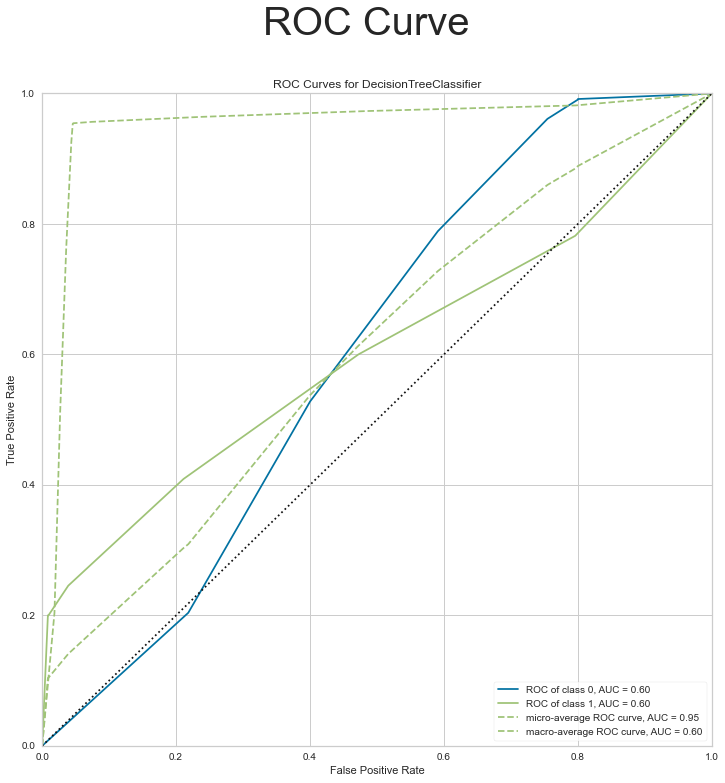

AttributeError: 'AxesSubplot' object has no attribute 'micro'

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = pplot.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(dtc, X_train, Y_train, X_test = X_test, y_test = Y_test, classes=[0,1], ax = ax)
curve.draw().micro
fig.savefig('DTC-Deceased-ROC-AUC.pdf')